In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

from tqdm import tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle

import matplotlib
from matplotlib import pyplot as plt
# from matplotlib import colors as mcolors
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from datetime import datetime
from src.support_class import *
from src.objComposite import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook

rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:16: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


last norm:  1.507207354910768 , 5.187453536929032 , 4.922913118777356
do_calculate_ecoli_Petsc: run 500 loops/times using 28.053604s
PETSC RK_5bs rt1e-12, at1e-15, dt1e-02 28.1s


True

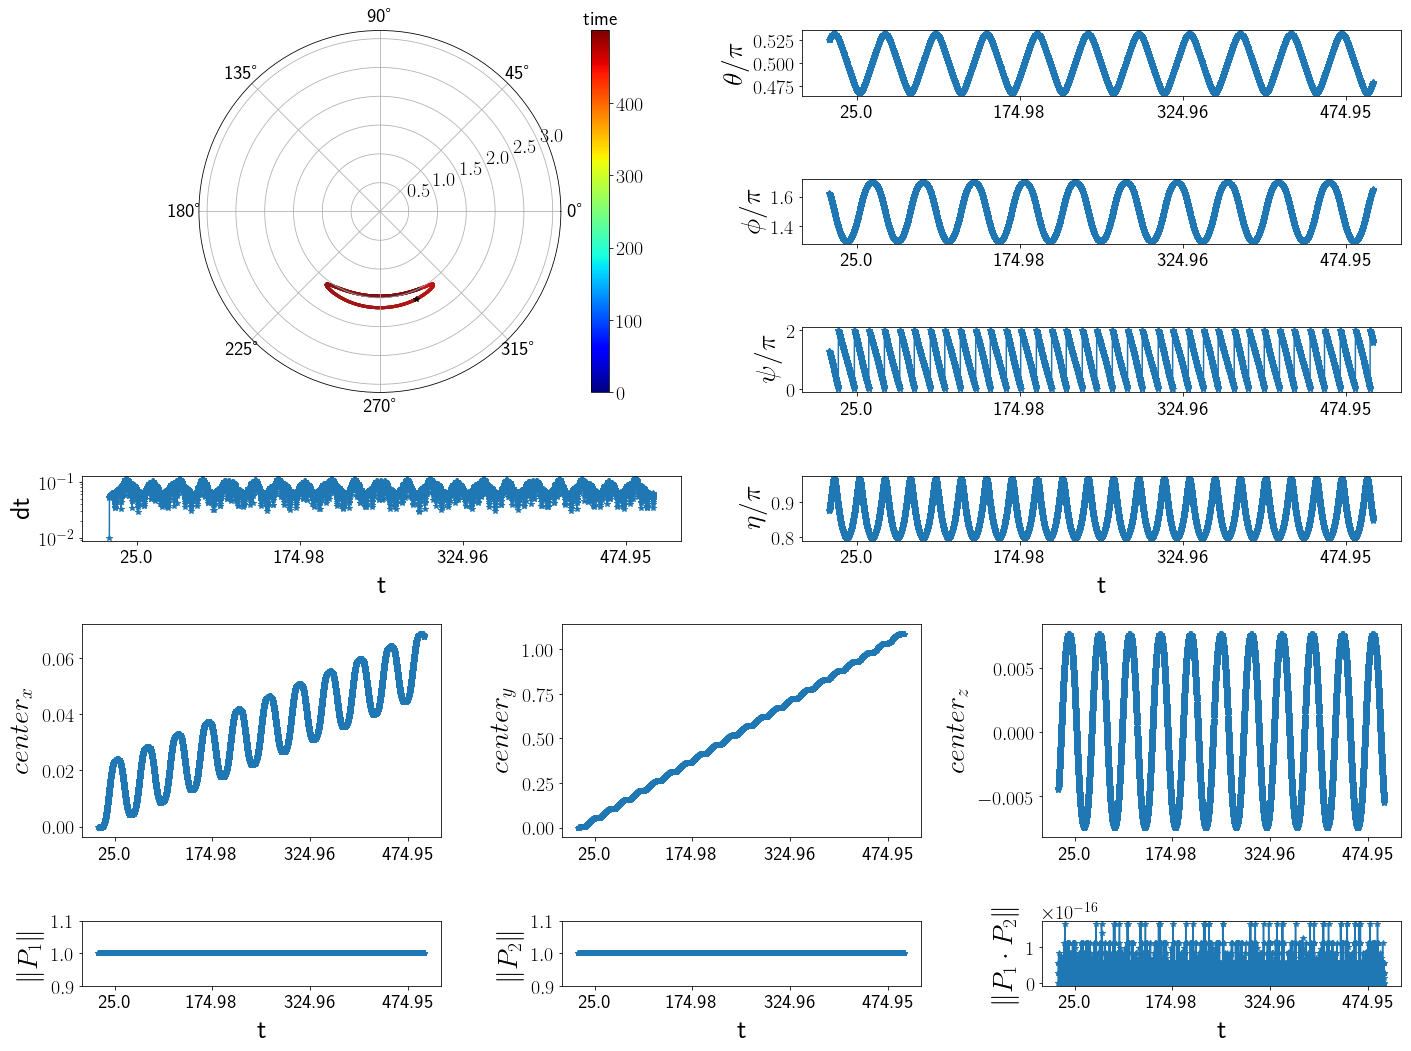

In [18]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 1.6479645462172878, 5.099706766061162, 4.091729348023375
max_t = 500
update_fun='5bs'
rtol=1e-12
atol=1e-15

eval_dt = 0.01
save_every = 1

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_helix_AvrPetsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                       eval_dt=eval_dt, save_every=save_every)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

# t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
#           Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# idx = np.load('../motion_ecoliB01_t able/idx.npy')
# t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
# np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
# with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
#     pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('save to %s' % t_name)

In [11]:
# t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
#           Table_t, Table_dt, Table_X, Table_P, Table_P2, 
#           Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# idx = np.load('../motion_ecoliB01_t able/idx.npy')
# t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
# np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
# with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
#     pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('save to %s' % t_name)

save to idx101_th1.639_ph1.537_ps0.471.pickle


/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')



init norm:  1.484566190475317 5.028115130696004 3.237812243983843
last norm:  1.5464769401397378 , 4.197209288523839 , 5.325972499201512
do_calculate_ecoli_Petsc: run 100 loops/times using 1798.145962s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 1798.1s


True

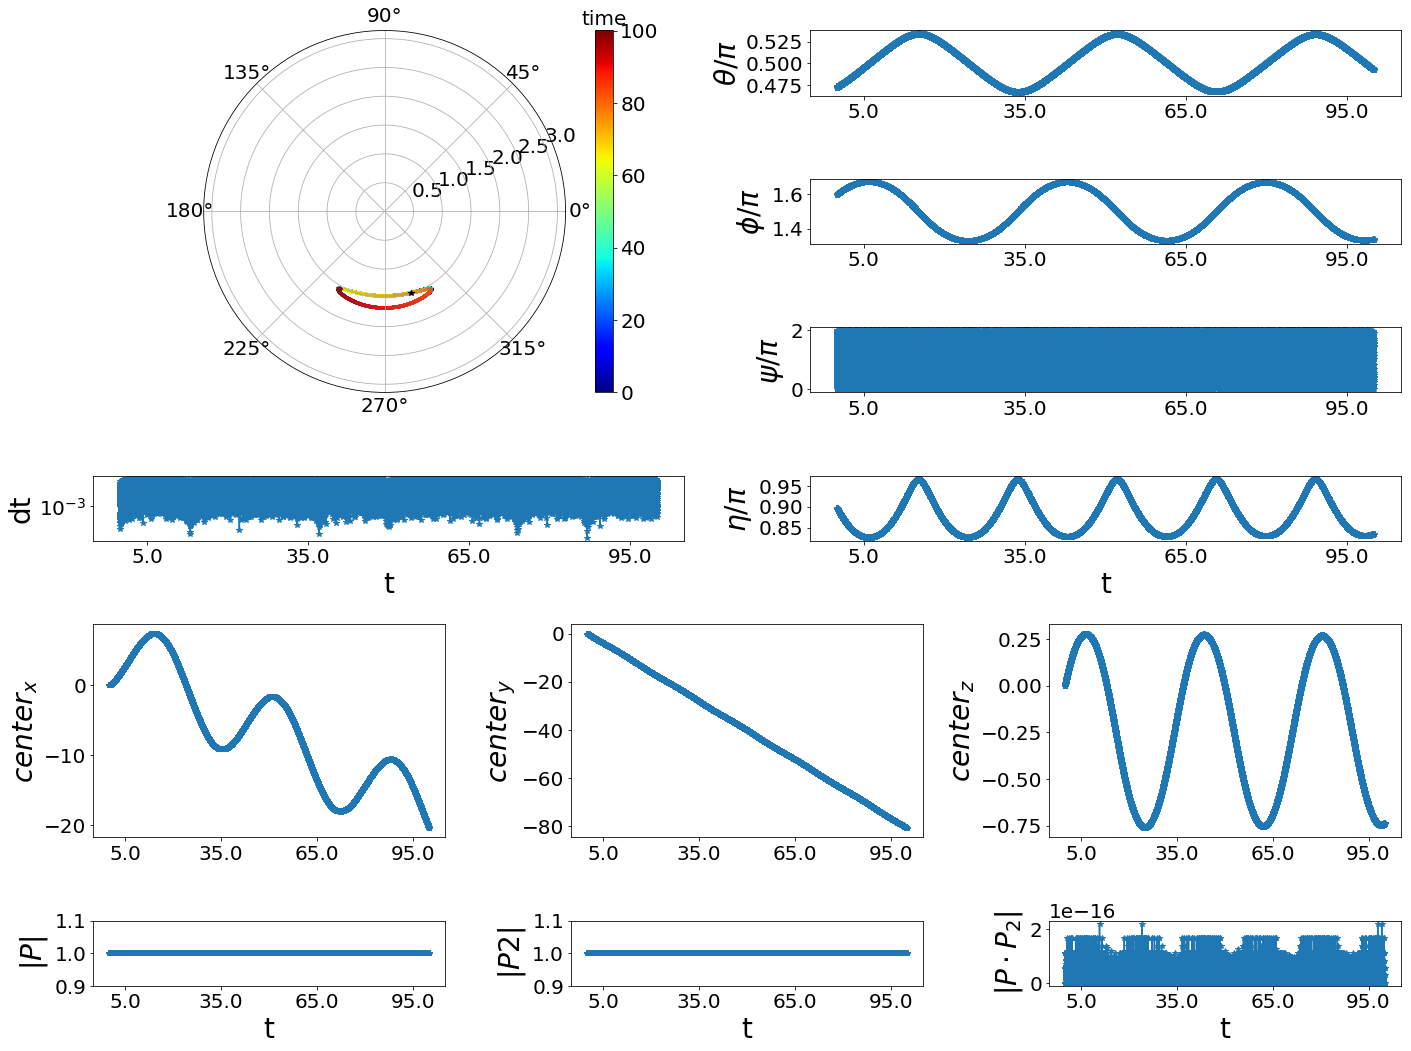

In [5]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = np.random.sample(3) * (1, 2, 2) * np.pi
t_theta, t_phi, t_psi = 1.6479645462172878, 5.099706766061162, 4.091729348023375
t_theta, t_phi, t_psi = 1.4845661904753169, 5.028115130696004, 3.237812243983843
max_t = 100
update_fun='5bs'
rtol=1e-9
atol=1e-12
eval_dt = 0.01
save_every = 1

# table_name='planeShearRatex_4c'
# omega_tail=48.41664953
table_name='planeShearRatex_1d'
omega_tail=193.66659814
# table_name='planeShearRatex_0.25c'
# omega_tail=774.66639255
# table_name='hlxC01_tau1a'
# omega_tail=0
# table_name='planeShearRatex_-1c'
# omega_tail=-193.66659814

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_Petsc4nPsi(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                       eval_dt=eval_dt, save_every=save_every, 
                                       table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('init norm: ', t_theta, t_phi, t_psi)
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

# t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
#           Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# idx = np.load('../motion_ecoliB01_t able/idx.npy')
# t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
# np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
# with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
#     pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('save to %s' % t_name)

In [6]:
Table_t.size

78871

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


trange_geo= 5.695352001230228
trange_trj= 80.69704523074475


/home/zhangji/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


finish 2019-06-19 07:42:56.117635


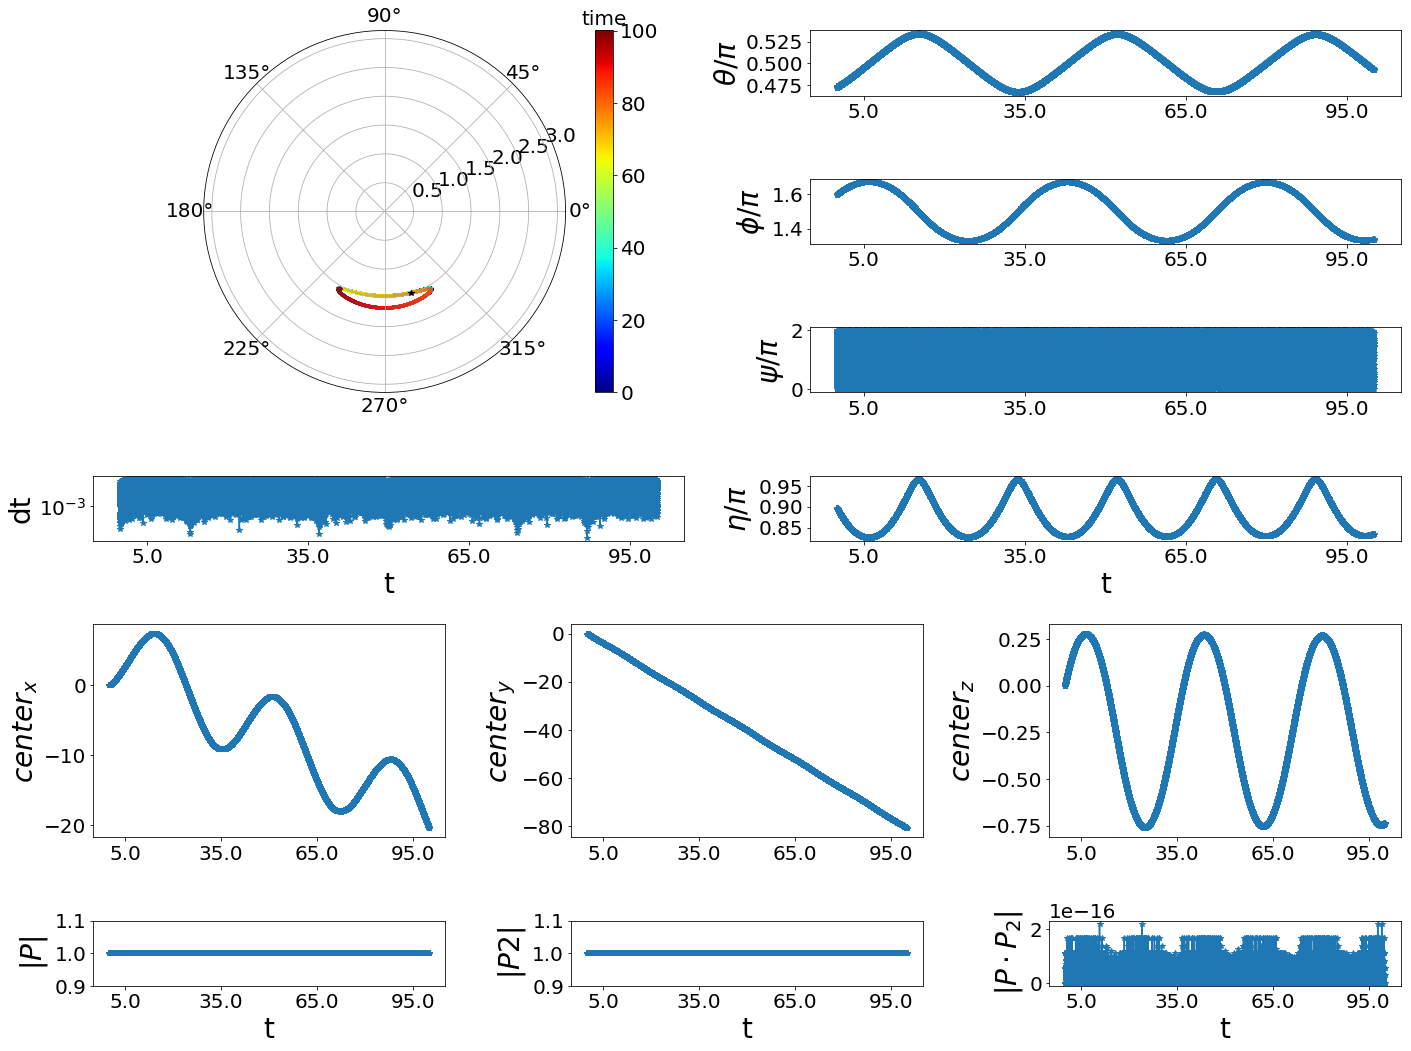

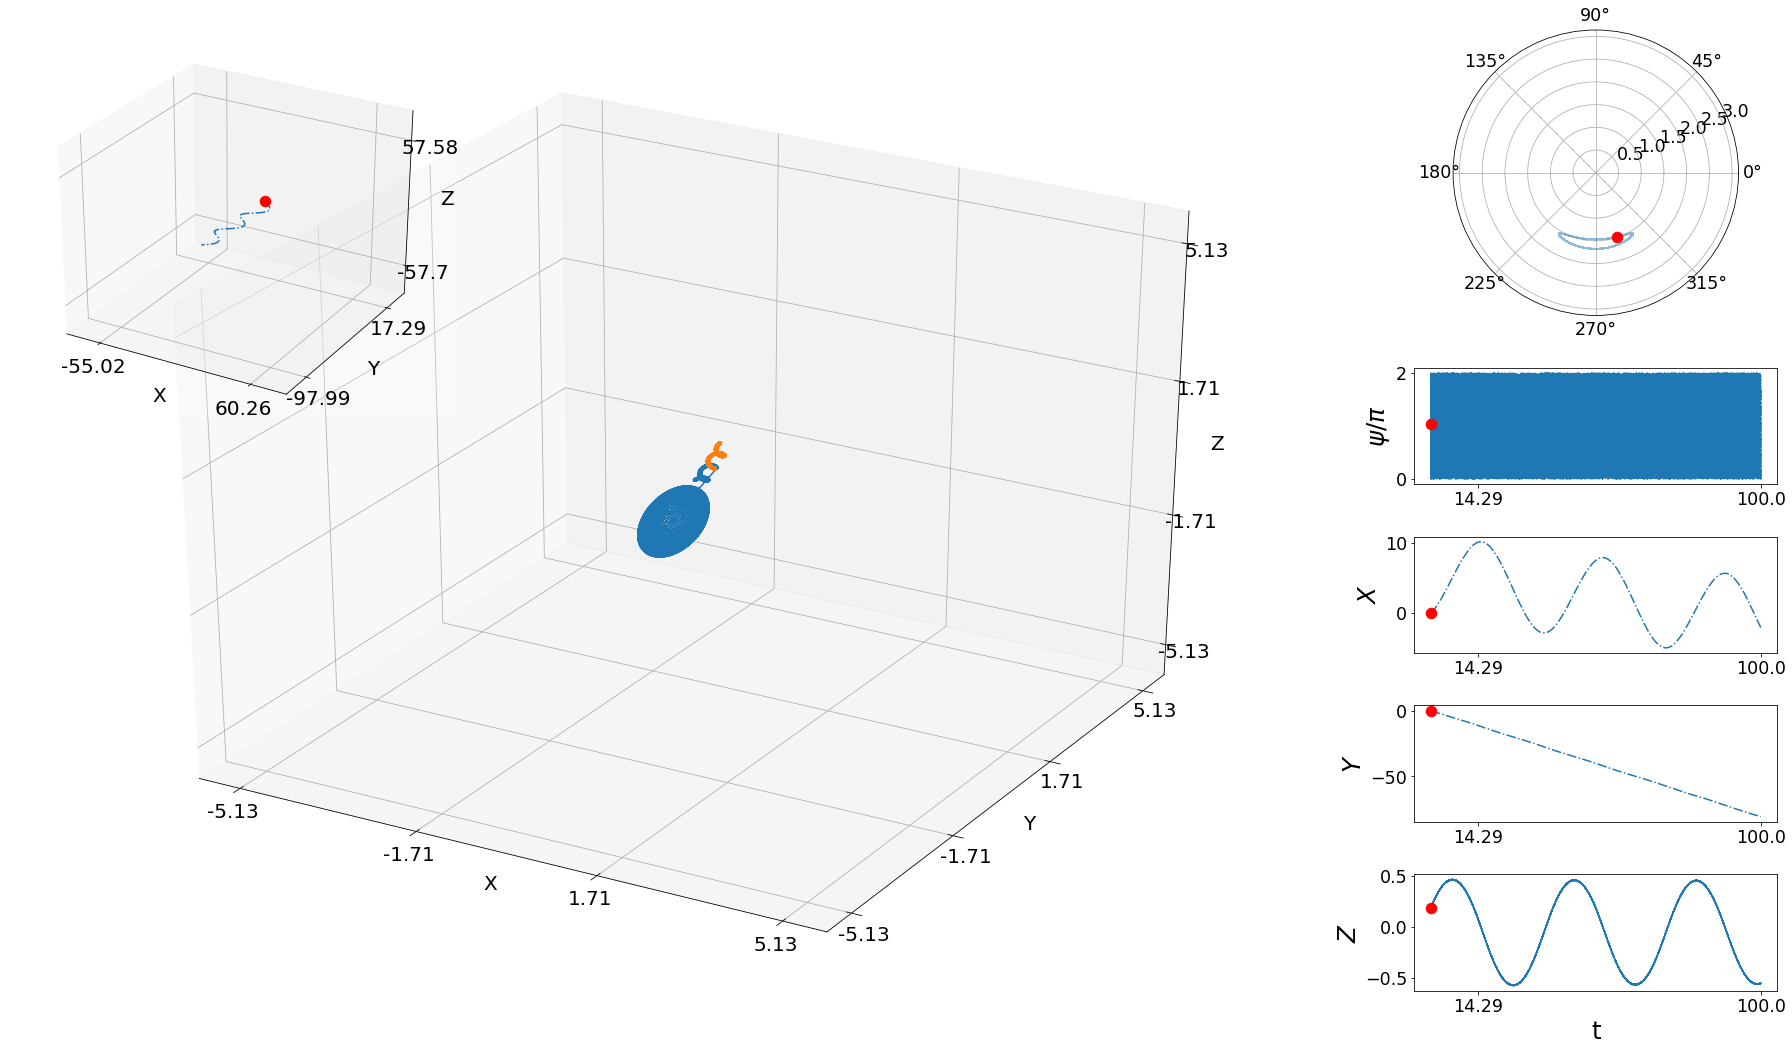

In [13]:
importlib.reload(spf_tb)
tidx = np.arange(Table_t.size)
pickle_name = 'planeShearRatex_1c_kwargs'
create_obj_at_fun = get_ecoli_nodes_split_at
resampling_fct = 0.1
problem_kwargs = spf_tb.load_problem_kwargs(pickle_name)

spf_tb.show_table_result(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                         Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], save_every)
anim = spf_tb.make_table_video_geo(Table_t[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx],
                               Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx],
                               zm_fct=30, stp=1, interval=1, trange=70, move_z=True, 
                               create_obj_at_fun=create_obj_at_fun, 
                               resampling_fct=resampling_fct, **problem_kwargs)
tname = '%s_th%5.3f_ph%5.3f_ps%5.3f.mp4' % (table_name, t_theta, t_phi, t_psi)
anim.save(tname, writer='ffmpeg', fps=15)
print('finish',tname, datetime.now())

In [14]:
tname

'planeShearRatex_1d_th1.485_ph5.028_ps3.238.mp4'

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')



init norm:  2.199114857512855 2.199114857512855 0.0
last norm:  1.6177812408832257 , 3.965730309227912 , 3.578873262761772
do_calculate_ecoli_Petsc: run 1000 loops/times using 749.638019s
PETSC RK_5bs rt1e-03, at1e-06, dt1e-02 749.6s


True

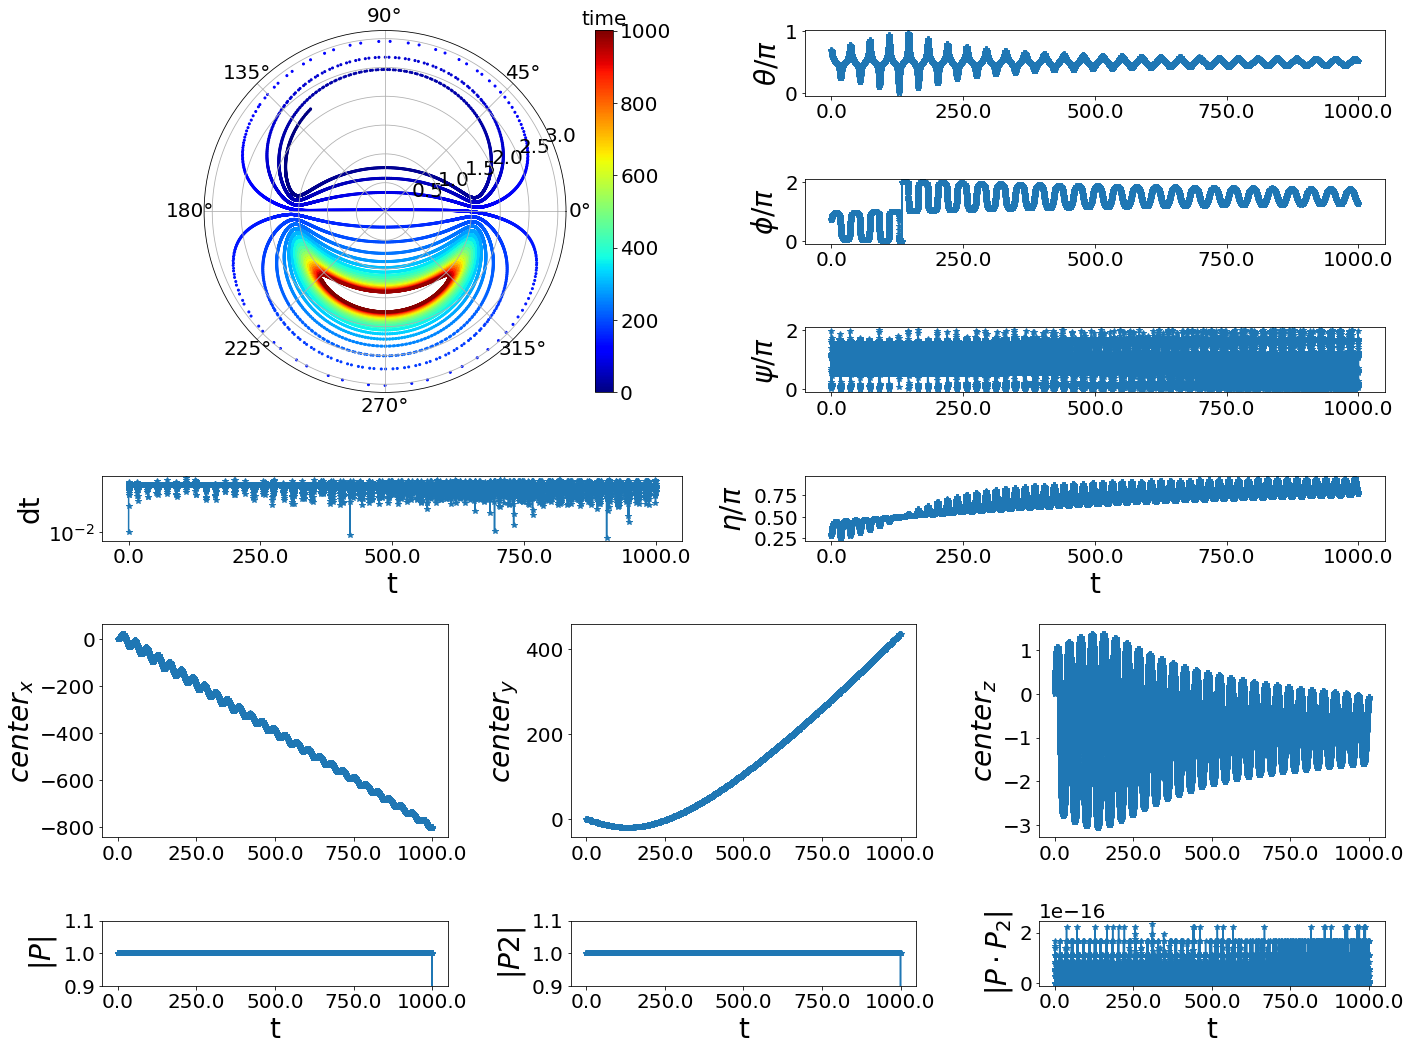

In [5]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = np.random.sample(3) * (1, 2, 2) * np.pi
t_theta, t_phi, t_psi = np.array((0.7, 0.7, 0)) * np.pi
max_t = 1000
update_fun='5bs'
rtol=1e-3
atol=1e-6
eval_dt = 0.01
save_every = 1

# table_name='planeShearRatex_4c'
# omega_tail=48.41664953
# table_name='planeShearRatex_1c'
# omega_tail=193.66659814
# table_name='planeShearRatex_0.25c'
# omega_tail=774.66639255
# table_name='hlxC01_tau1a'
# omega_tail=0
table_name='planeShearRatex_-1c'
omega_tail=-193.66659814

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                       eval_dt=eval_dt, save_every=save_every, 
                                       table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('init norm: ', t_theta, t_phi, t_psi)
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

# t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
#           Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# idx = np.load('../motion_ecoliB01_t able/idx.npy')
# t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
# np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
# with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
#     pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('save to %s' % t_name)

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


init norm: 1.092728, 6.015816, 0.000000
last norm: 1.468369, 0.266122, 0.056152
do_calculate_helix_Petsc4n: run 10000 loops/times using 3217.948424s
PETSC RK_5bs rt1e-12, at1e-15, dt1e-02 3217.9s


True

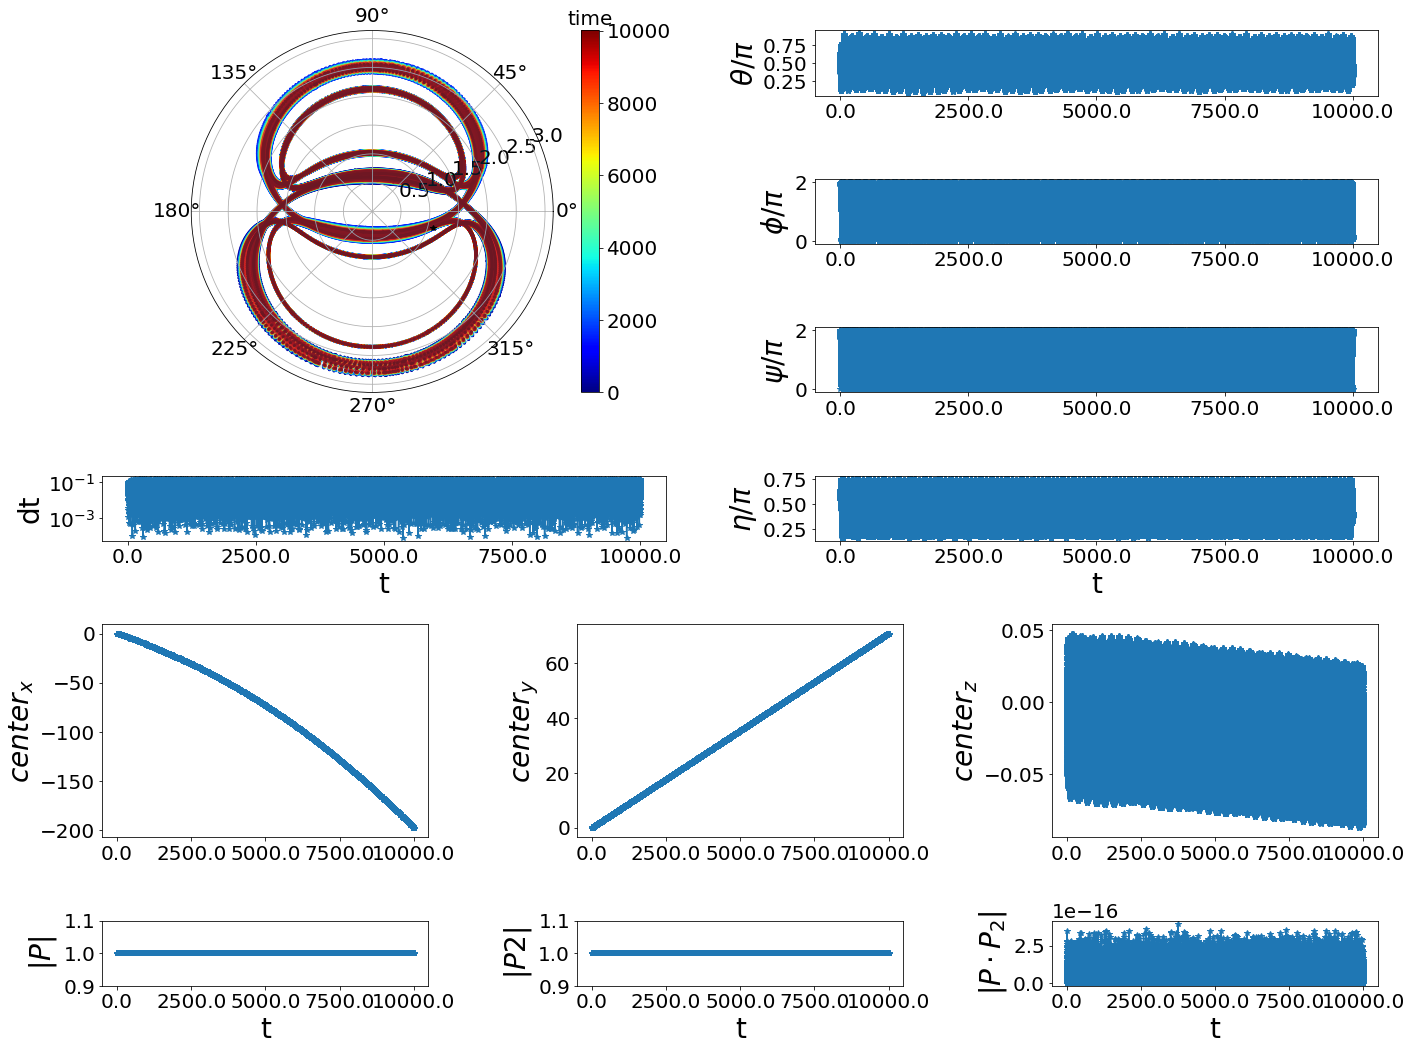

In [365]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = np.random.sample(3) * (1, 2, 2) * np.pi
t_theta, t_phi, t_psi = 1.092728, 6.015816, 0
max_t = 10000
update_fun='5bs'
rtol=1e-12
atol=1e-15
eval_dt = 0.01
save_every = 1

table_name='hlxC01_tau1a'
omega_tail=0

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_helix_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                       eval_dt=eval_dt, save_every=save_every, 
                                       table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('init norm: %f, %f, %f' % ( t_theta, t_phi, t_psi))
print('last norm: %f, %f, %f' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
print('%s: run %d loops/times using %fs' % ('do_calculate_helix_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


True

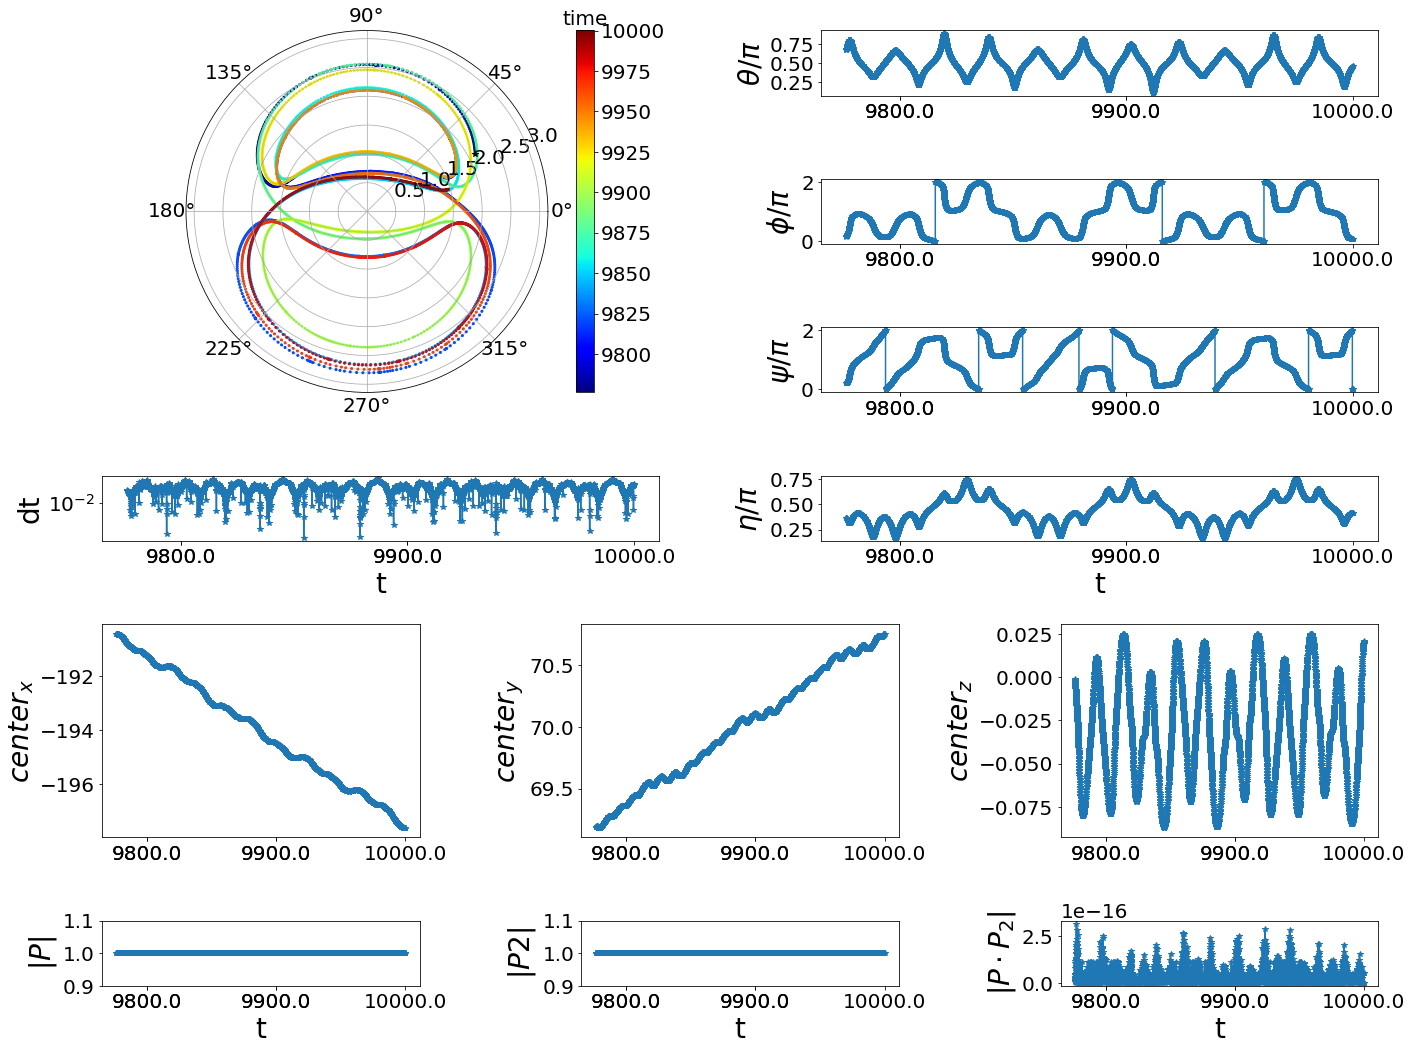

In [366]:
importlib.reload(spf_tb)

idx = np.arange(Table_t.size - 5000, Table_t.size)
spf_tb.show_table_result(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                         Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx], save_every)

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


True

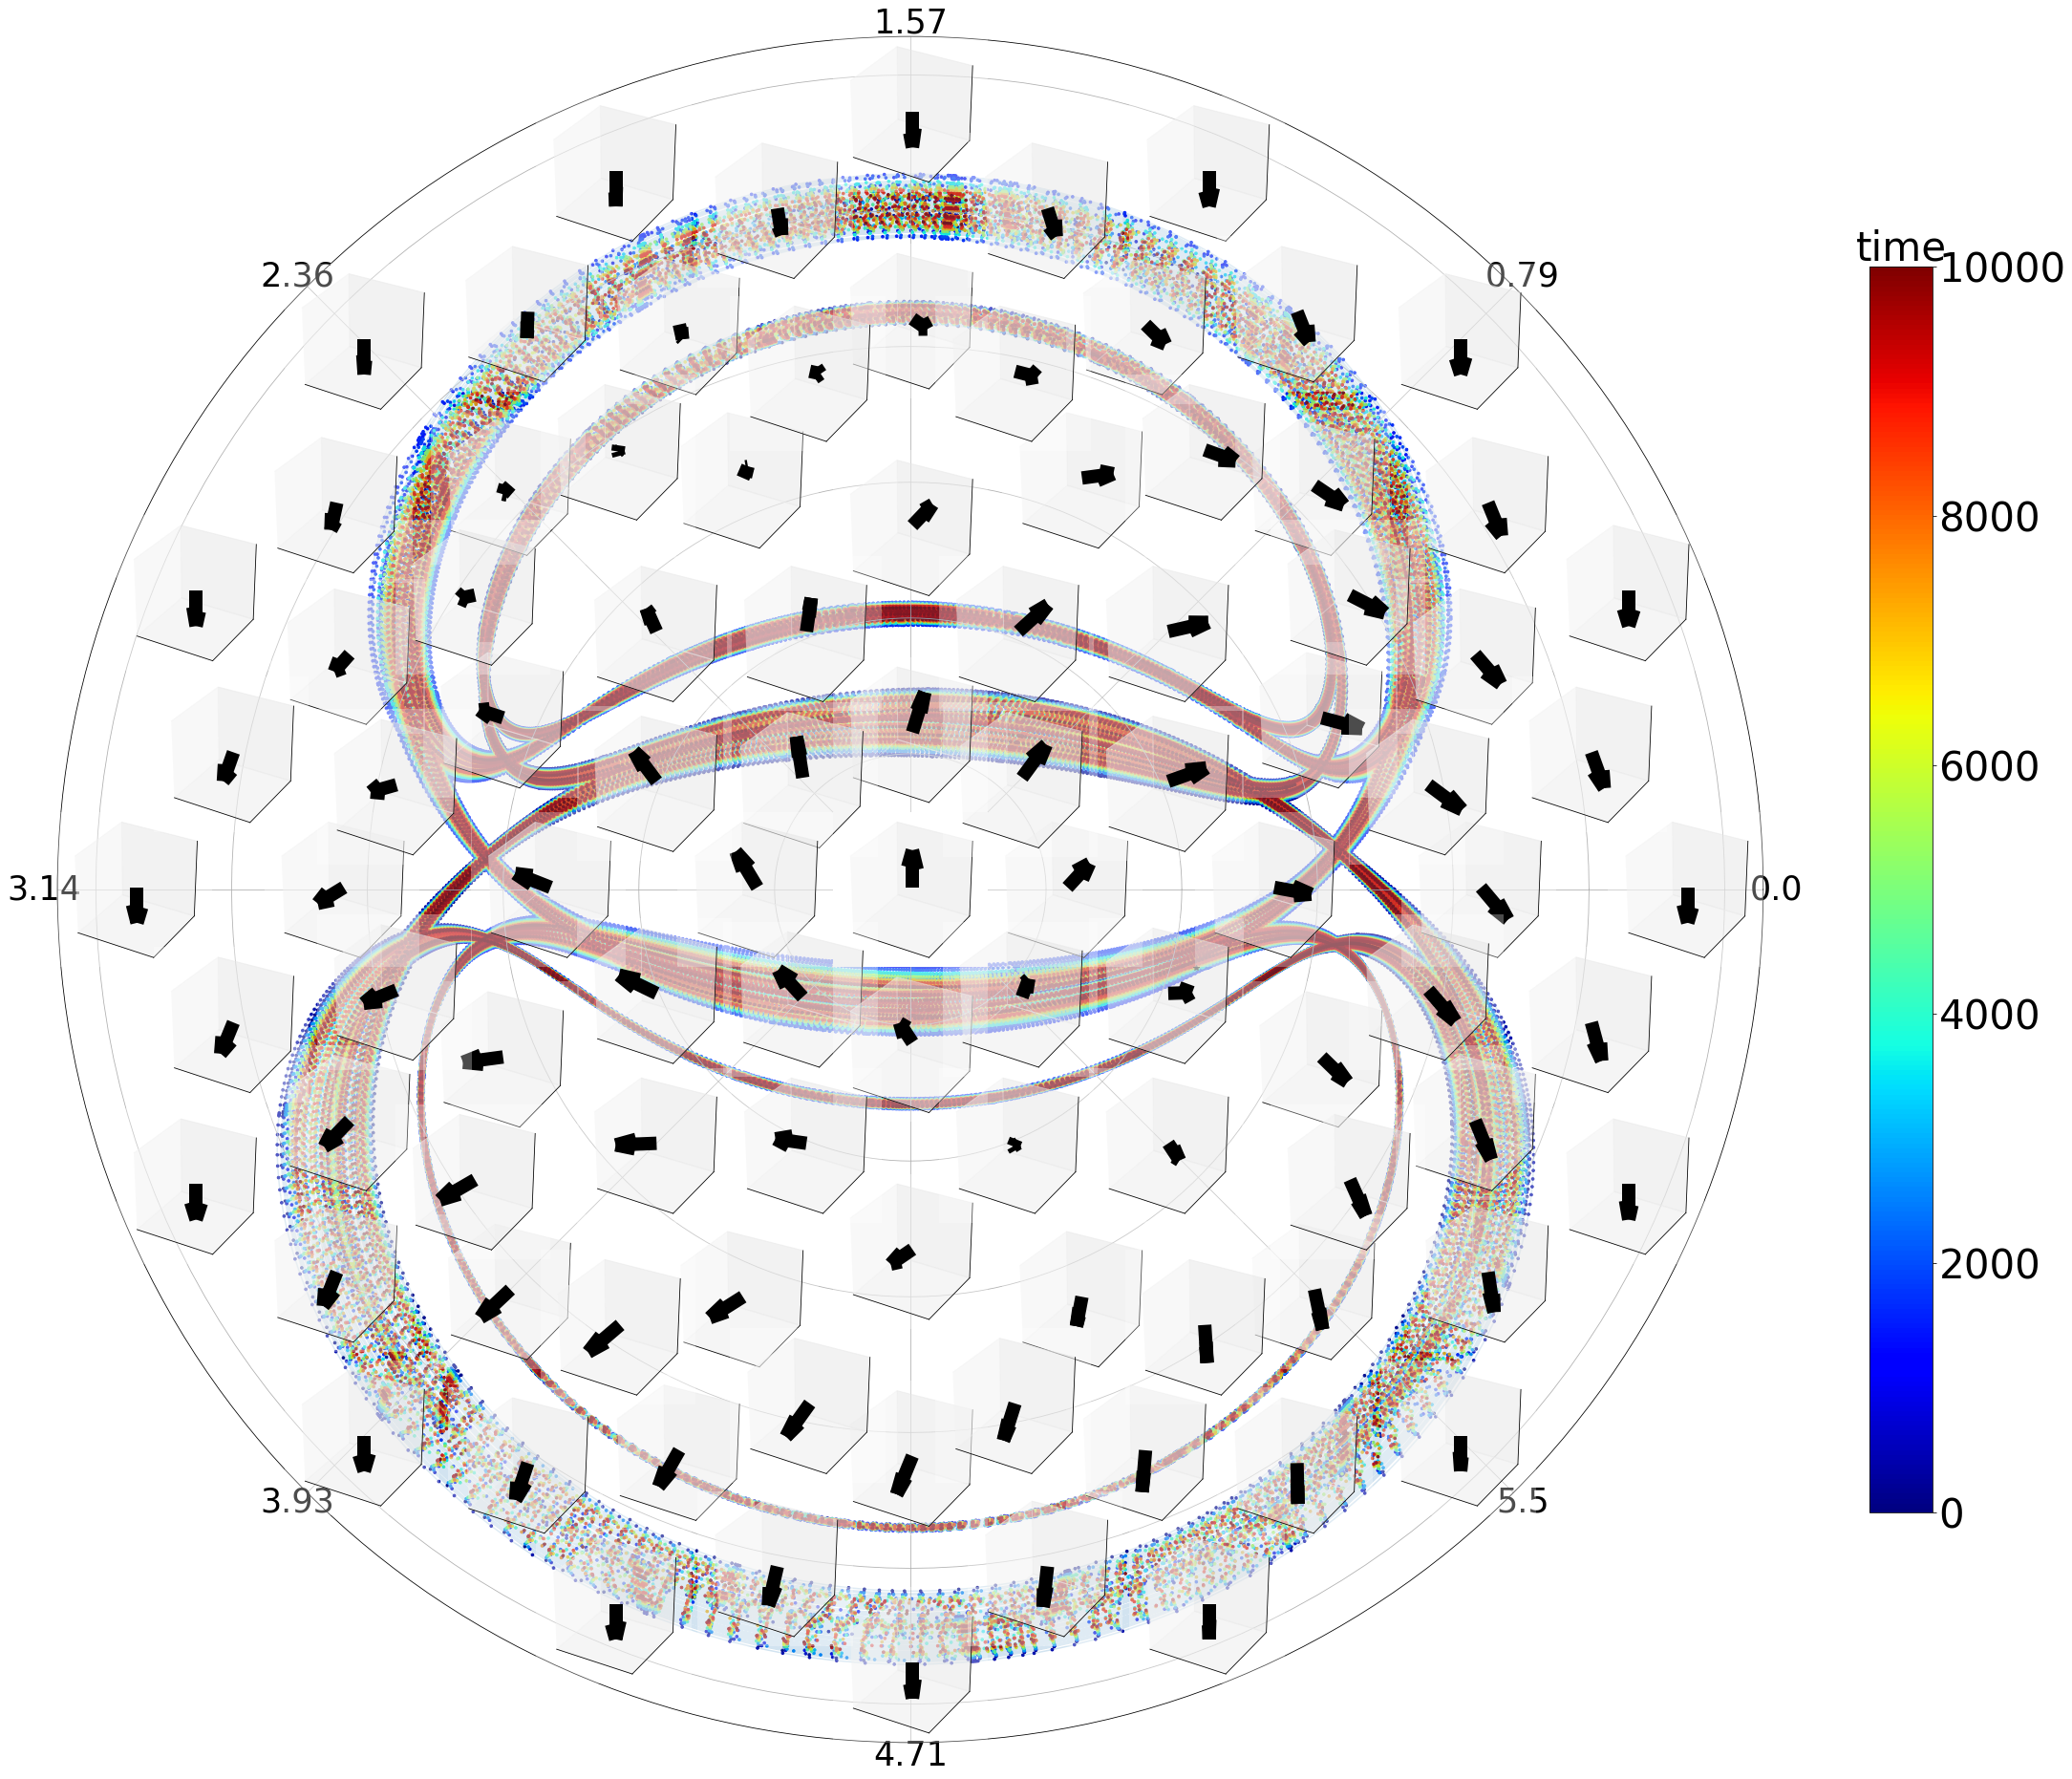

In [373]:
importlib.reload(spf_tb)

idx = np.arange(0, Table_t.size)
spf_tb.show_theta_phi(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                         Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx], save_every)

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


(array([1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01,
        1.e+03, 1.e+05]), <a list of 12 Text yticklabel objects>)

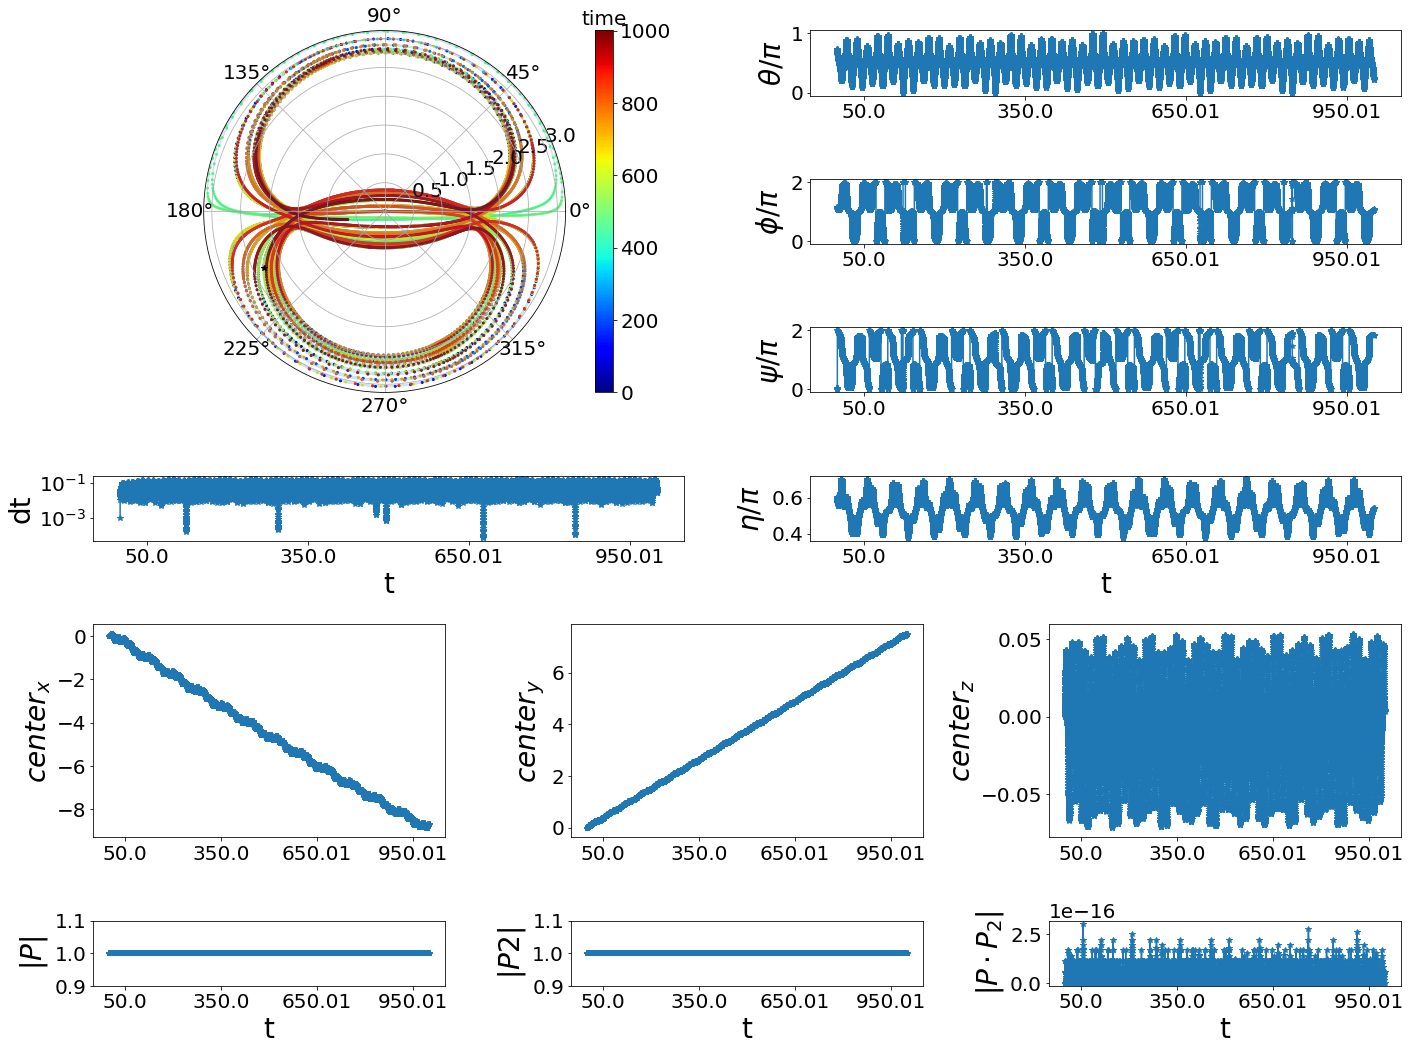

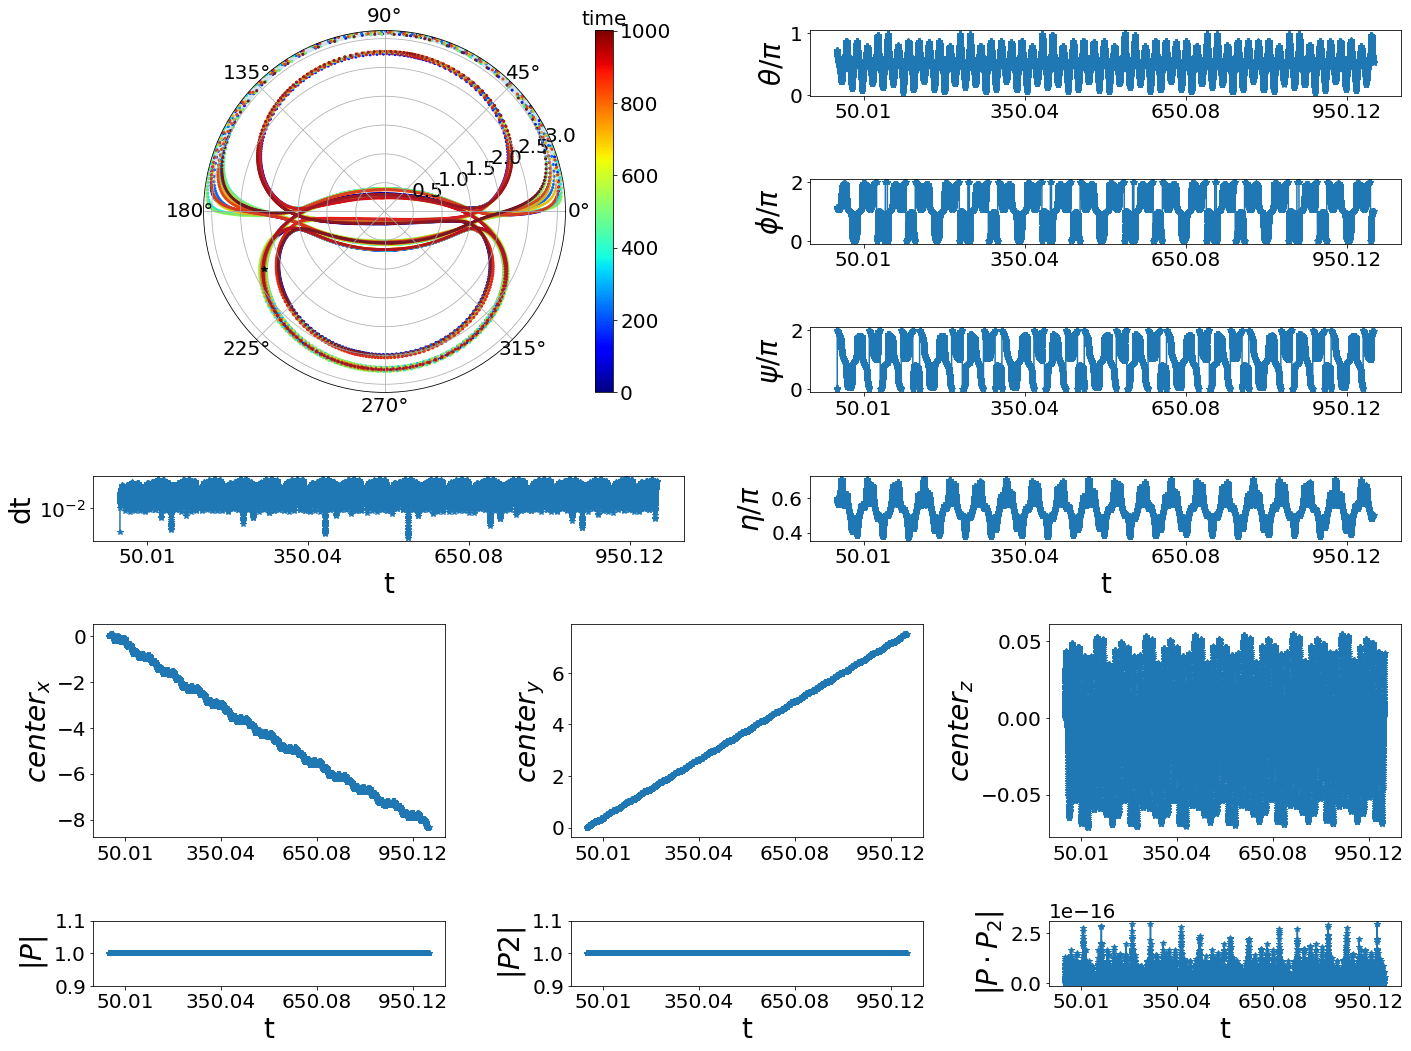

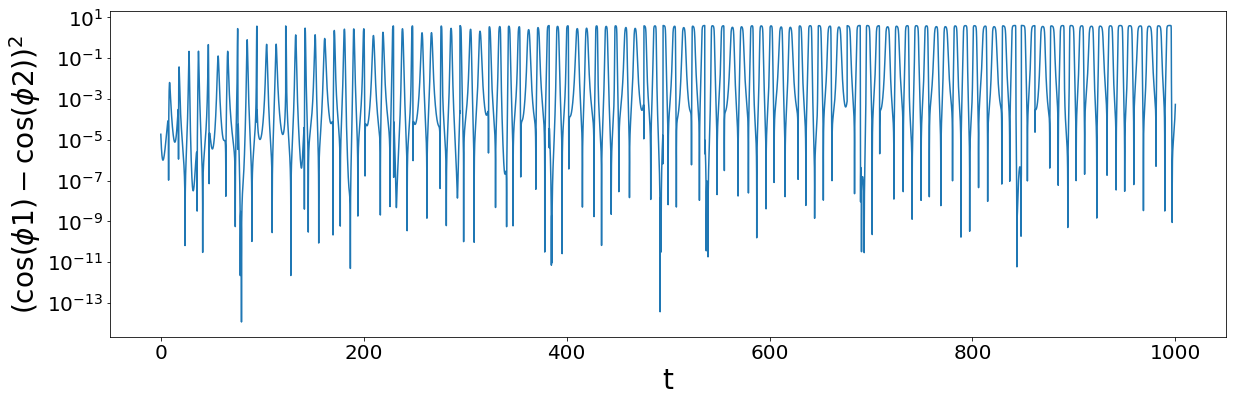

In [3]:
# passive helix petsc family method, check if is chaotic
importlib.reload(spf_tb)
t0 = time()
max_t = 1000
update_fun='3bs'
rtol=1e-6
atol=1e-9
eval_dt = 1e-3
save_every = 1
table_name='hlxC01_tau1a'
omega_tail=0
t_theta1, t_phi1, t_psi1 = 2.3152741272218287, 3.5814852379695763, 0.18965274298144974
t_theta2, t_phi2, t_psi2 = t_theta1, t_phi1 + 0.01, t_psi1

# result: Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta
tnorm1 = np.array((np.sin(t_theta1) * np.cos(t_phi1), np.sin(t_theta1) * np.sin(t_phi1), np.cos(t_theta1)))
result1 = spf_tb.do_calculate_helix_Petsc4n(tnorm1, t_psi1, max_t, 
                                            update_fun=update_fun, rtol=rtol, atol=atol, 
                                            eval_dt=eval_dt, save_every=save_every, 
                                            table_name=table_name, omega_tail=omega_tail)
spf_tb.show_table_result(*result1, save_every)
tnorm2 = np.array((np.sin(t_theta2) * np.cos(t_phi2), np.sin(t_theta2) * np.sin(t_phi2), np.cos(t_theta2)))
result2 = spf_tb.do_calculate_helix_Petsc4n(tnorm2, t_psi2, max_t, 
                                            update_fun=update_fun, rtol=rtol, atol=atol, 
                                            eval_dt=eval_dt, save_every=save_every, 
                                            table_name=table_name, omega_tail=omega_tail)
spf_tb.show_table_result(*result2, save_every)

Table_t1 = result1[0]
Table_t2 = result2[0]
Table_phi1 = result1[6]
Table_phi2 = result2[6]
t1 = np.max((Table_t1.min(), Table_t2.min()))
t2 = np.min((Table_t1.max(), Table_t2.max()))
t_use = np.linspace(t1, t2, Table_t1.size + Table_t2.size)
phi1 = spf_tb.get_continue_angle(Table_t1, Table_phi1, t_use=t_use)
phi2 = spf_tb.get_continue_angle(Table_t2, Table_phi2, t_use=t_use)
delta_cos2psi = (np.cos(phi1) - np.cos(phi2)) ** 2

fig = plt.figure(figsize=(20, 6))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(111)
ax0.semilogy(t_use, delta_cos2psi)
plt.sca(ax0)
ax0.set_xlabel('t', size=fontsize * 0.7)
ax0.set_ylabel('$(\cos(\phi1) - \cos(\phi2))^2$', size=fontsize * 0.7)
plt.xticks(fontsize=fontsize * 0.5)
plt.yticks(fontsize=fontsize * 0.5)

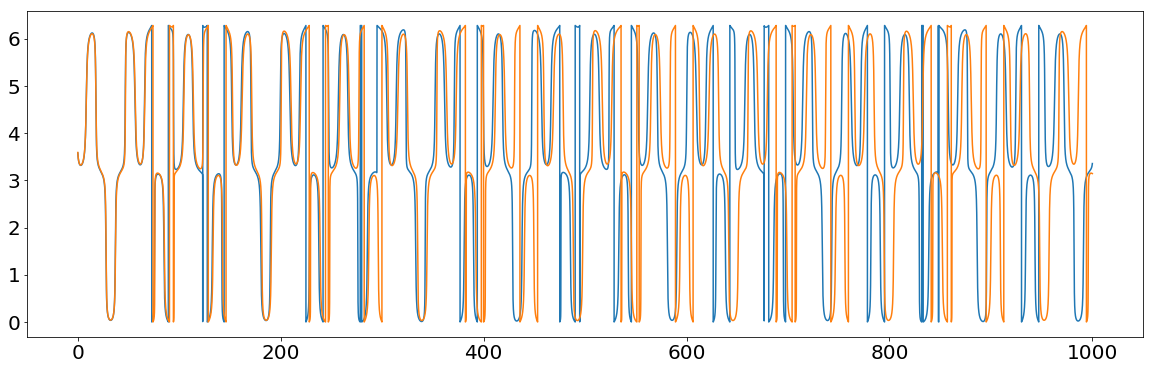

In [16]:
fig = plt.figure(figsize=(20, 6))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(111)
ax0.plot(t_use, phi1)
ax0.plot(t_use, phi2)
